In [26]:
%pylab inline
import pickle
import scipy.interpolate

Populating the interactive namespace from numpy and matplotlib


# Scale dependent bias for stellar mass cuts

/home/akbhowmi/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/home/akbhowmi/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in sqrt


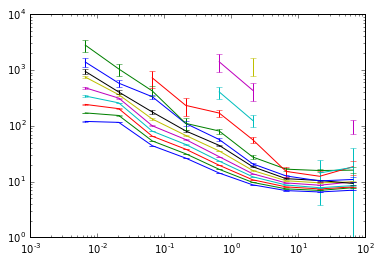

In [62]:
z=8.0
r_dm,xi_dm=pickle.load(open('../non_linear_dark_matter_correlations/xid_z%d.pickle'%z))
#plt.errorbar(r_dm,xi_dm)
gen_dm=scipy.interpolate.interp1d(numpy.log10(r_dm),numpy.log10(xi_dm))

lcut_space=numpy.array([7.5,7.75,8.0,8.25,8.5,8.75,9.0,9.25,9.5,9.75,10.0,10.25,10.5,10.75])
large_scale_bias=[]
dlarge_scale_bias=[]
for lcut in lcut_space:
    r,xi,dxi,N=pickle.load(open('./galaxy_correlation_functions/xi_z%.1f_%.1f_SM_cut_galaxy_COM.pickle'%(z,lcut)))
    xi_dark=10**gen_dm(numpy.log10(r))
    bias=numpy.sqrt(xi/xi_dark)
    dbias=dxi/xi_dark/(2.*bias)
    plt.errorbar(r,bias,dbias)
    pickle.dump([r,bias,dbias],open('./scale_dependent_bias/z%.1f_%.1f_SM_cut_galaxy_COM.pickle'%(z,lcut),'w'))
    large_scale_bias.append(bias[-2])
    dlarge_scale_bias.append(dbias[-2])
    
large_scale_bias=numpy.array(large_scale_bias)
dlarge_scale_bias=numpy.array(dlarge_scale_bias)
pickle.dump([lcut_space,large_scale_bias,dlarge_scale_bias],open('./large_scale_bias/z%.1f_galaxy_COM.pickle'%(z),'w'))
    
plt.xscale('log')
plt.yscale('log')
    
    

# Scale dependent bias for apparent magnitude cuts

/home/akbhowmi/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/home/akbhowmi/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt


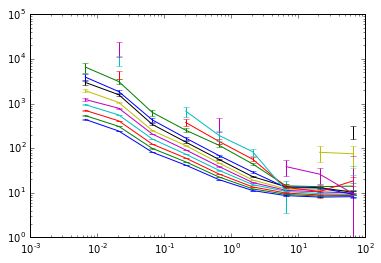

In [73]:
z=10.0
r_dm,xi_dm=pickle.load(open('../non_linear_dark_matter_correlations/xid_z%d.pickle'%z))
gen_dm=scipy.interpolate.interp1d(numpy.log10(r_dm),numpy.log10(xi_dm))
lcut_space=numpy.array([31,30.5,30,29.5,29,28.5,28,27.5,27,26.5,26,25.5,25,24.5,24])
large_scale_bias=[]
dlarge_scale_bias=[]

for lcut in lcut_space:
    r,xi,dxi,N=pickle.load(open('./galaxy_correlation_functions/xi_z%.1f_%.1f_mUV_cut_galaxy_COM.pickle'%(z,lcut)))
    xi_dark=10**gen_dm(numpy.log10(r))
    bias=numpy.sqrt(xi/xi_dark)
    dbias=dxi/xi_dark/(2.*bias)
    plt.errorbar(r,bias,dbias)
    pickle.dump([r,bias,dbias],open('./scale_dependent_bias_magnitude/z%.1f_%.1f_SM_cut_galaxy_COM.pickle'%(z,lcut),'w'))
    large_scale_bias.append(bias[-2])
    dlarge_scale_bias.append(dbias[-2])
        
large_scale_bias=numpy.array(large_scale_bias)
dlarge_scale_bias=numpy.array(dlarge_scale_bias)
pickle.dump([lcut_space,large_scale_bias,dlarge_scale_bias],open('./large_scale_bias_magnitude//z%.1f_galaxy_COM.pickle'%(z),'w'))
        

plt.xscale('log')
plt.yscale('log')